In [4]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 

In [5]:
#Importing required libraries
import re
import nltk
import tweepy
import gensim
import string
import sklearn
import pyLDAvis
import textwrap
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import gensim.corpora as corpora
import pyLDAvis.gensim_models as gensimvis
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from pprint import pprint
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from community import community_louvain

In [ ]:
#Extracting Followers Count
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
data = []
for username in usernames:
    user = api.get_user(screen_name=username)
    follower_count = user.followers_count
    data.append({"Username": username, "Follower Count": follower_count})

df_followers = pd.DataFrame(data)

print(df_followers)


In [ ]:
df_followers.sort_values(by=['Follower Count'], ascending=False,inplace= True)
print(df_followers)

In [ ]:
df_followers.to_csv('C:/Dissertation/Datasets/followers.csv')

In [ ]:
#Read Tweets

In [ ]:
df_tw1= pd.read_csv('C:/Dissertation/Datasets/file1.csv')
df_tw2= pd.read_csv('C:/Dissertation/Datasets/file1b.csv')
df_tw3= pd.read_csv('C:/Dissertation/Datasets/file1c.csv')
df_tw4= pd.read_csv('C:/Dissertation/Datasets/file1d.csv')
df_tw5= pd.read_csv('C:/Dissertation/Datasets/file1e.csv')
df_tw6= pd.read_csv('C:/Dissertation/Datasets/file1f.csv')
df_tw7= pd.read_csv('C:/Dissertation/Datasets/file1g.csv')
df_tw8= pd.read_csv('C:/Dissertation/Datasets/file1h.csv')
df_tw9= pd.read_csv('C:/Dissertation/Datasets/file1i.csv')
df_tw10= pd.read_csv('C:/Dissertation/Datasets/file1k.csv')
df_tw11= pd.read_csv('C:/Dissertation/Datasets/file1l.csv')
df_tw12= pd.read_csv('C:/Dissertation/Datasets/file1m.csv')

In [ ]:
#Combining all files
dfs = [df_tw1, df_tw2, df_tw3, df_tw4, df_tw5, df_tw6, df_tw7, df_tw8, df_tw9, df_tw10, df_tw11,df_tw12]
combined_df = pd.concat(dfs, keys=['df_tw1', 'df_tw2', 'df_tw3', 'df_tw4', 'df_tw5', 'df_tw6', 'df_tw7', 'df_tw8', 'df_tw9', 'df_tw10', 'df_tw11','df_tw12'])
combined_df = combined_df.reset_index(level=0, drop=True)

In [ ]:
combined_df

,Unnamed: 0,User,Text,Created At,Likes,Retweets,Hashtags
0,0,VitalikButerin,The Three Transitions:\n\nhttps://t.co/rtewRnm2wK,2023-06-09 12:52:00+00:00,4333,1189,[]
1,1,VitalikButerin,"We can do the work to understand, prevent, and...",2023-06-08 17:49:24+00:00,999,181,[]
2,2,VitalikButerin,Pandemics beyond Covid continue to be a large ...,2023-06-08 17:29:49+00:00,732,57,[]
3,3,VitalikButerin,We look forward to ongoing collaboration betwe...,2023-06-08 17:29:49+00:00,513,32,[]
4,4,VitalikButerin,I'm really happy @sandeepnailwal and @Cryptore...,2023-06-08 17:29:48+00:00,725,138,[]
...,...,...,...,...,...,...,...
32610,32610,cryptocoley,@alexisohanian Nice win! Wahoowa!,2020-03-01 02:52:16+00:00,0,0,[]
32611,32611,cryptocoley,@cachehash @Burton Didn’t at all.,2020-03-01 02:43:15+00:00,3,0,[]
32612,32612,cryptocoley,@scottmelker @nlw @Burton It’s 20 years old. L...,2020-03-01 02:24:26+00:00,5,0,[]
32613,32613,cryptocoley,"@cachehash @Burton Worthy question, I bring Wa...",2020-03-01 02:23:59+00:00,2,0,[]


In [ ]:
combined_df = combined_df.drop('Unnamed: 0', axis=1)

In [ ]:
#Find no of influencers: 91
combined_df['User'].unique()

array(['VitalikButerin', 'jihanwu', 'BarrySilbert', 'brian_armstrong',
       'iohk_charles', 'cameron', 'JedMcCaleb', 'StaniKulechov',
       'AndreCronjeTech', 'pmarca', 'twobitidiot', 'OneMorePeter',
       'gavinandresen', 'kaiynne', 'starkness', 'spair', 'sammcingvale',
       'bobbyong', 'polychain', 'jespow', 'vansa_c', 'RuneKek',
       'bengoertzel', 'BlockFiZac', 'dan_pantera', 'adam3us',
       'CaitlinLong_', 'dan_schulman', 'CathieDWood', 'chamath', 'tyler',
       'haydenzadams', 'ethereumJoseph', 'rleshner', 'jerallaire',
       'joyce', 'coinmarketcap', 'evankuo', 'ptj_official', 'breitwoman',
       'nejc_kodric', 'ssrinawakoon', 'aantonop', 'naval',
       'brendanblumer', 'ErikVoorhees', 'brianbrooksocc', 'galiabenartzi',
       'SatoshiLite', 'cdixon', 'apompliano', 'NickSzabo4', 'arrington',
       'lopp', 'VinnyLingham', 'CharlieShrem', 'timdraper', 'laurashin',
       'dahongfei', 'AriDavidPaul', 'fluffypony', 'sallyeaves',
       'cryptomanran', 'katie_haun', 'j

In [ ]:
# Filter tweets since 2022
combined_df['Date'] = pd.to_datetime(combined_df['Created At'])
combined_df['Date'] = combined_df['Date'].dt.strftime('%Y-%m-%d')
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
df_filtered = combined_df[combined_df['Date'].dt.year >= 2022]

In [ ]:
df_tweets= combined_df

In [ ]:
df_filtered.to_csv("Downloads/testdate.csv")

In [ ]:
#Extract words with "#" using regular expressions
df_tweets['hashtags'] = df_tweets['Text'].str.findall(r'#\w+')
df_tweets['hashtags'] = df_tweets['hashtags'].apply(lambda x: [tag.strip('#') for tag in x])
df_tweets['hashtags'] = df_tweets['hashtags'].apply(lambda x: ', '.join(x))

In [ ]:
df_tweets['Cleaned_text']=df_tweets['Text'].str.replace('http[^\s]*',"")
df_tweets['Cleaned_text']= df_tweets['Cleaned_text'].str.replace('(@\w+.*?)',"")
#Removing extra spaces from the 'text'
df_tweets['Cleaned_text'] = df_tweets['Cleaned_text'].str.replace('\s+', ' ', regex=True).str.strip()
#Function to remove non-ASCII characters
def remove_non_ascii(s):
    return ''.join([c for c in s if ord(c) < 128])
df_tweets['Cleaned_text'] = df_tweets['Cleaned_text'].apply(remove_non_ascii)
#Replacing empty spaces with NaN
df_tweets['Cleaned_text'] = df_tweets['Cleaned_text'].replace('', np.nan)
df_tweets = df_tweets.dropna(subset=['Cleaned_text'], how='all')

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\535760537.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweets['Cleaned_text']=df_tweets['Text'].str.replace('http[^\s]*',"")
C:\Users\felix\AppData\Local\Temp\ipykernel_24940\535760537.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweets['Cleaned_text']= df_tweets['Cleaned_text'].str.replace('(@\w+.*?)',"")


In [ ]:
#Converting the column to lowercase
df_tweets['Cleaned_text'] = df_tweets['Cleaned_text'].str.lower()

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\505239942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['Cleaned_text'] = df_tweets['Cleaned_text'].str.lower()


In [ ]:
#Removed Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df_tweets['Removed_punc'] = df_tweets['Cleaned_text'].apply(lambda x: remove_punct(x))

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\257814382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['Removed_punc'] = df_tweets['Cleaned_text'].apply(lambda x: remove_punct(x))


In [ ]:
#Stop words removal
stopword = nltk.corpus.stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stopword]
    return ' '.join(filtered_tokens)

df_tweets['Tweet_nonstop'] = df_tweets['Removed_punc'].apply(remove_stopwords)

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\3687557586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['Tweet_nonstop'] = df_tweets['Removed_punc'].apply(remove_stopwords)


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Lemmatization to keep the root word
wn = nltk.WordNetLemmatizer()

def lemmatizer(sentence):
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [wn.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df_tweets['Tweet_lemmatized'] = df_tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\162983783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['Tweet_lemmatized'] = df_tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))


In [ ]:
#df_filtered=df_tweets[df_tweets['Date'].dt.year >= 2023]
df_filtered = df_tweets[(df_tweets['Date'] >= pd.Timestamp(2023, 2, 27)) & (df_tweets['Date'] <= pd.Timestamp(2023, 5, 31))]

In [ ]:
df_filtered.to_csv("C:/Dissertation/Datasets/cleaned.csv")

In [ ]:
df_bag_of_words= pd.read_csv("C:/Dissertation/Datasets/BagOfWords.csv")

In [ ]:
df_bag_of_words

,words
0,51% attack
1,51% attack protection
2,account
3,account balance
4,accredited investor
...,...
610,zk-snarks
611,grayscale
612,coinbase
613,mint


In [ ]:
def lemmatizer(sentence):
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [wn.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df_bag_of_words['words_lemma'] = df_bag_of_words['words'].apply(lambda x: lemmatizer(x))

In [ ]:
bag_list= df_bag_of_words['words'].tolist()

In [ ]:
bag_list

['51% attack',
 '51% attack protection',
 'account',
 'account balance',
 'accredited investor',
 'active management',
 'addresses',
 'adoption',
 'after-hours trading',
 'aggregate demand',
 'aggregate supply',
 'aggressive growth fund',
 'air gapping',
 'airdrop',
 'algorithm',
 'all-or-none order (aon)',
 'all-time high (ath)',
 'all-time low (atl)',
 'alpha',
 'altcoin',
 'altcoins',
 'alternative investments',
 'amex',
 'aml',
 'analyst',
 'annual percentage rate (apr)',
 'annual report',
 'anti-money laundering (aml)',
 'application-specific integrated circuit (asic)',
 'arbitrage',
 'asset',
 'asset allocation',
 'asset bubble',
 'asset class',
 'asset management',
 'asset-backed security (abs)',
 'assets under management (aum)',
 'ath',
 'atm',
 'atomic swap',
 'at-the-market offering (atm)',
 'auction market',
 'authorized participant',
 'average down',
 'average true range (atr)',
 'bag',
 'bag holder',
 'balance of trade',
 'balance sheet',
 'bank',
 'bank for international 

In [ ]:
bag_list = [*set(bag_list)]

In [ ]:
word_present = []

# Iterating over each tweet in the 'tweets' column
for tweet in df_filtered['Tweet_lemmatized']:
    if any(re.search(r'\b{}\b'.format(word), tweet, flags=re.IGNORECASE) for word in bag_list):
        word_present.append(True)
    else:
        word_present.append(False)

In [ ]:
df_filtered['word_present'] = word_present

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\3238631686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_present'] = word_present


In [ ]:
#Filtering and keeping only the tweets where "word_present" is true
filtered_df2 = df_filtered[df_filtered['word_present']]

In [ ]:
filtered_df2.to_csv("C:\Dissertation\Datasets\cleaned2_final.csv")
df_filtered.to_csv("C:\Dissertation\Datasets\cleaned2.csv")

In [ ]:
#Counting the number of True and False values
counts = df_filtered['word_present'].value_counts()
print(counts)

False    13554
True     11680
Name: word_present, dtype: int64


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
#Compute the Sentiment and Compound Scores
filtered_df2['sentiment_scores'] = filtered_df2['Tweet_lemmatized'].apply(lambda x: vader.polarity_scores(x))
filtered_df2['compound_score'] = filtered_df2['sentiment_scores'].apply(lambda x: x['compound'])

C:\Users\felix\AppData\Local\Temp\ipykernel_24940\526835951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['sentiment_scores'] = filtered_df2['Tweet_lemmatized'].apply(lambda x: vader.polarity_scores(x))
C:\Users\felix\AppData\Local\Temp\ipykernel_24940\526835951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['compound_score'] = filtered_df2['sentiment_scores'].apply(lambda x: x['compound'])


In [ ]:
df_sorted = filtered_df2.sort_values(by='compound_score', ascending=True)

In [ ]:
df_followers= pd.read_csv("C:/Dissertation/Datasets/followers.csv")

In [ ]:
df_followers = df_followers.rename(columns={'Username': 'User'})

In [ ]:
left_join_df_filtered = pd.merge(filtered_df2, df_followers, on='User', how='left')

In [ ]:
left_join_df_filtered

,User,Text,Created At,Likes,Retweets,Hashtags,Date,hashtags,Cleaned_text,Removed_punc,Tweet_nonstop,Tweet_lemmatized,word_present,sentiment_scores,compound_score,Unnamed: 0,Follower Count
0,VitalikButerin,Don't overload Ethereum's consensus:\n\nhttps:...,2023-05-21 18:48:08+00:00,6005,1701,[],2023-05-21,,don't overload ethereum's consensus:,dont overload ethereums consensus,dont overload ethereums consensus,dont overload ethereums consensus,True,"{'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'comp...",0.2755,0,4928000
1,VitalikButerin,Self-custody is important. And social recovery...,2023-03-17 06:01:45+00:00,7045,2965,[],2023-03-17,,self-custody is important. and social recovery...,selfcustody is important and social recovery a...,selfcustody important social recovery multisig...,selfcustody important social recovery multisig...,True,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.7096,0,4928000
2,jihanwu,It was glad to get the book Crypto Titans in h...,2023-05-10 13:03:07+00:00,32,53,[],2023-05-10,,it was glad to get the book crypto titans in h...,it was glad to get the book crypto titans in h...,glad get book crypto titans hands afternoon es...,glad get book crypto titan hand afternoon esse...,True,"{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'comp...",0.8360,1,114385
3,jihanwu,RT @crypto: The Kingdom of Bhutan and Nasdaq-l...,2023-05-03 12:36:40+00:00,0,21,[],2023-05-03,,rt : the kingdom of bhutan and nasdaq-listed c...,rt the kingdom of bhutan and nasdaqlisted com...,rt kingdom bhutan nasdaqlisted company bitdeer...,rt kingdom bhutan nasdaqlisted company bitdeer...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,114385
4,jihanwu,RT @cz_binance: Smart! 👍 \n\nWondering how man...,2023-05-02 19:01:51+00:00,0,1571,[],2023-05-02,,rt : smart! wondering how many others are doi...,rt smart wondering how many others are doing...,rt smart wondering many others kingdom bhutan ...,rt smart wondering many others kingdom bhutan ...,True,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.4019,1,114385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11675,DomSchiener,@mdudas most beautiful country in the world (n...,2023-03-13 17:38:52+00:00,37,1,[],2023-03-13,,most beautiful country in the world (next to s...,most beautiful country in the world next to sw...,beautiful country world next switzerland reall...,beautiful country world next switzerland reall...,True,"{'neg': 0.199, 'neu': 0.56, 'pos': 0.241, 'com...",0.2975,89,65966
11676,DomSchiener,RT @DamiDefi: 2 reasons $SMR is amazing :\n\n1...,2023-03-13 10:59:29+00:00,0,29,[],2023-03-13,,rt : 2 reasons $smr is amazing : 1. since $smr...,rt reasons smr is amazing since smrs dag b...,rt reasons smr amazing since smrs dag base lay...,rt reason smr amazing since smrs dag base laye...,True,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.7430,89,65966
11677,DomSchiener,"RT @bitpanda: Here we go, perhaps the most hig...",2023-03-07 13:58:06+00:00,0,297,[],2023-03-07,,"rt : here we go, perhaps the most highly reque...",rt here we go perhaps the most highly request...,rt go perhaps highly requested asset ever firs...,rt go perhaps highly requested asset ever firs...,True,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4173,89,65966
11678,DomSchiener,#Shimmer is coming to @bitpanda 🚀\n\nVery exci...,2023-03-02 09:34:29+00:00,1063,295,"[{'text': 'Shimmer', 'indices': [0, 8]}]",2023-03-02,Shimmer,#shimmer is coming to very excited that one o...,shimmer is coming to very excited that one of...,shimmer coming excited one leading crypto inve...,shimmer coming excited one leading crypto inve...,True,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.3400,89,65966


In [ ]:
#FinalScore = CompoundScore∗ UserF ollowerCount∗ (Likes + 1) ∗ (RetweetCount + 1)
left_join_df_filtered['FinalScore'] = left_join_df_filtered['compound_score'] * left_join_df_filtered['Follower Count'] * (left_join_df_filtered['Likes'] + 1) * (left_join_df_filtered['Retweets'] + 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scores = left_join_df_filtered['FinalScore'].values.reshape(-1, 1)
normalized_scores = scaler.fit_transform(scores)
left_join_df_filtered['FinalScore'] = normalized_scores

In [ ]:
#Scaling the scores between -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scores = left_join_df_filtered['FinalScore'].values.reshape(-1, 1)
normalized_scores = scaler.fit_transform(scores)
left_join_df_filtered['FinalScore'] = normalized_scores

In [ ]:
left_join_df_filtered = left_join_df_filtered.reset_index(drop=True)
left_join_df_filtered = left_join_df_filtered.drop(['word_present', 'Unnamed: 0'], axis=1)
left_join_df_filtered.to_csv("C:/Dissertation/Datasets/vader.csv")

In [ ]:
#Summing scores for each day
sum_scores = left_join_df_filtered.groupby('Date')['FinalScore'].sum()
sum_scores_df = pd.DataFrame(sum_scores).reset_index()
sum_scores_df.to_csv("C:/Dissertation/Datasets/sumscore2.csv")

In [10]:
#Importing tweet csv
tweetdata = pd.read_csv("C:/Users/LENOVO/Downloads/tweetdata.csv")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: ignored

In [12]:
followercount = pd.read_csv('C:/Users/LENOVO/Desktop/followers.csv')
vader = pd.read_csv('C:/Users/LENOVO/Desktop/vader.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: ignored

Average number of tweets per user: 490.25882352941176
Average length of a tweet: 102.98924937607987
Average number of retweets: 180.0221011710501
Average number of likes: 475.3511230562488


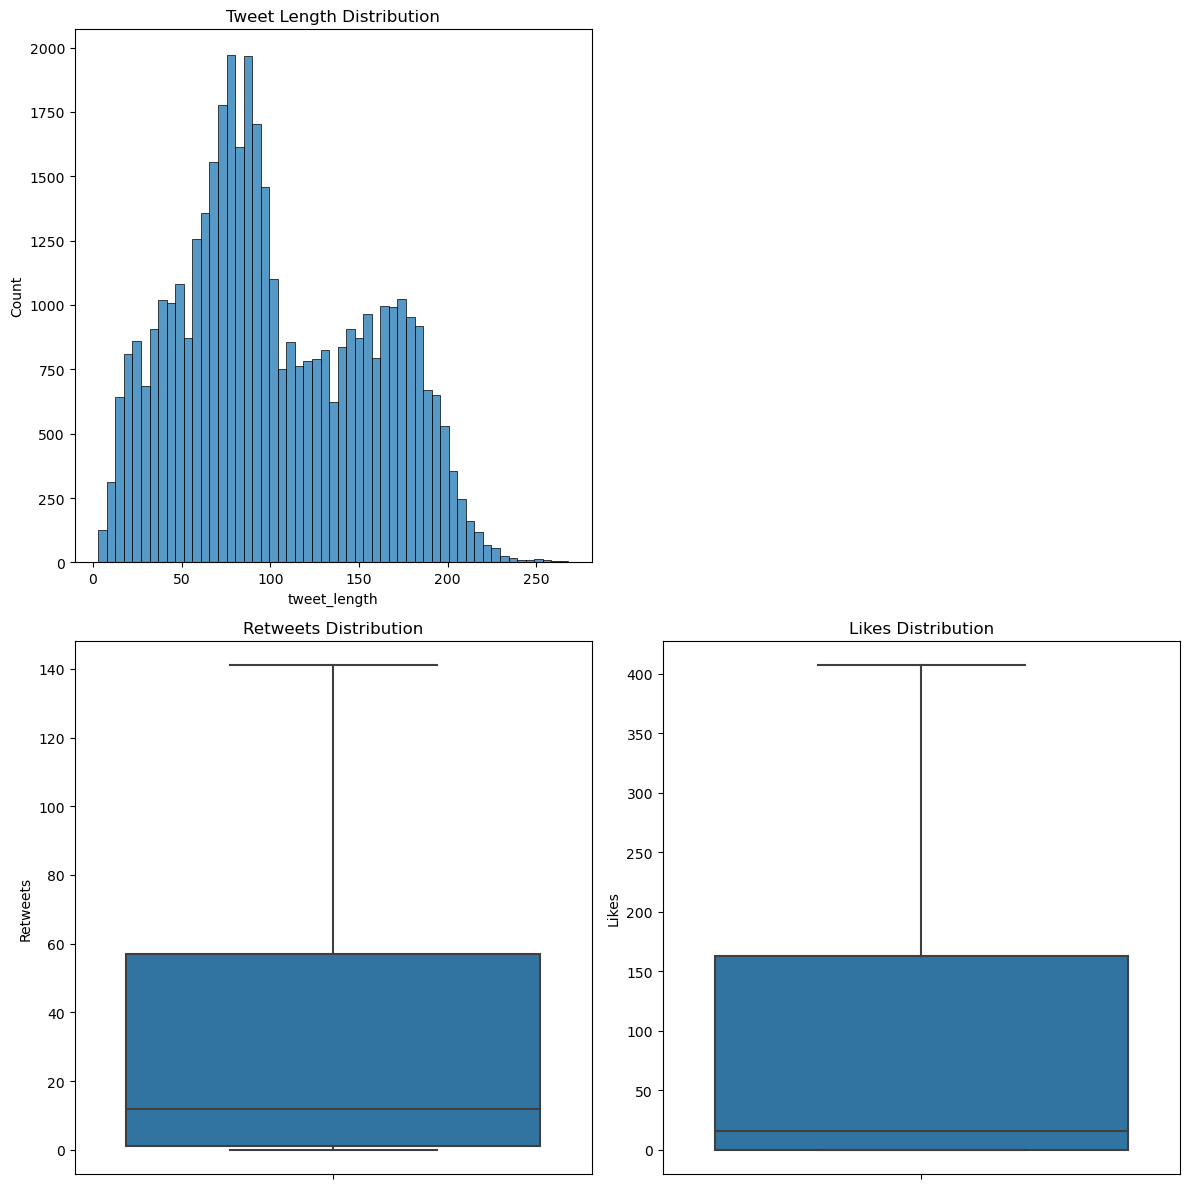

In [ ]:
##Descriptive Stats for Tweets
# Number of tweets per influencer
tweets_per_user = tweetdata['User'].value_counts()

# Average length of tweets
tweetdata['tweet_length'] = tweetdata['Tweet_lemmatized'].apply(len)
avg_tweet_length = tweetdata['tweet_length'].mean()

# Average number of retweets and likes
avg_retweets = tweetdata['Retweets'].mean()
avg_likes = tweetdata['Likes'].mean()

print("Average number of tweets per user:", tweets_per_user.mean())
print("Average length of a tweet:", avg_tweet_length)
print("Average number of retweets:", avg_retweets)
print("Average number of likes:", avg_likes)

# Graphs
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(tweetdata['tweet_length'], ax=ax[0, 0])
ax[0, 0].set_title('Tweet Length Distribution')

sns.boxplot(y='Retweets', data=tweetdata, showfliers=False, ax=ax[1, 0])
ax[1, 0].set_title('Retweets Distribution')

sns.boxplot(y='Likes', data=tweetdata, showfliers=False, ax=ax[1, 1])
ax[1, 1].set_title('Likes Distribution')

fig.delaxes(ax[0,1])

plt.tight_layout()
plt.show()

In [ ]:
#Creating a copy
tweetdata_copy = tweetdata
tweetdata_copy['Date'] = pd.to_datetime(tweetdata_copy['Date'])

In [ ]:
#Create a new column 'date_only' to hold only the date part (without time)
tweetdata_copy['date_only'] = tweetdata_copy['Date'].dt.date

In [ ]:
#Number of tweets per day
#Tweet count per day
daily_tweet_counts = tweetdata_copy['date_only'].value_counts().sort_index()
output_notebook()

p = figure(title="Number of tweets per day", x_axis_label='Date', y_axis_label='Number of tweets',
           x_axis_type="datetime", plot_width=1200, plot_height=650)

p.line(daily_tweet_counts.index, daily_tweet_counts, legend_label="Tweets per day", line_width=2)

hover = HoverTool(
    tooltips=[
        ('date', '@x{%F}'),
        ('count', '@y'),
    ],
    formatters={
        '@x': 'datetime',
    },
)

p.add_tools(hover)

show(p)


Loading BokehJS ...

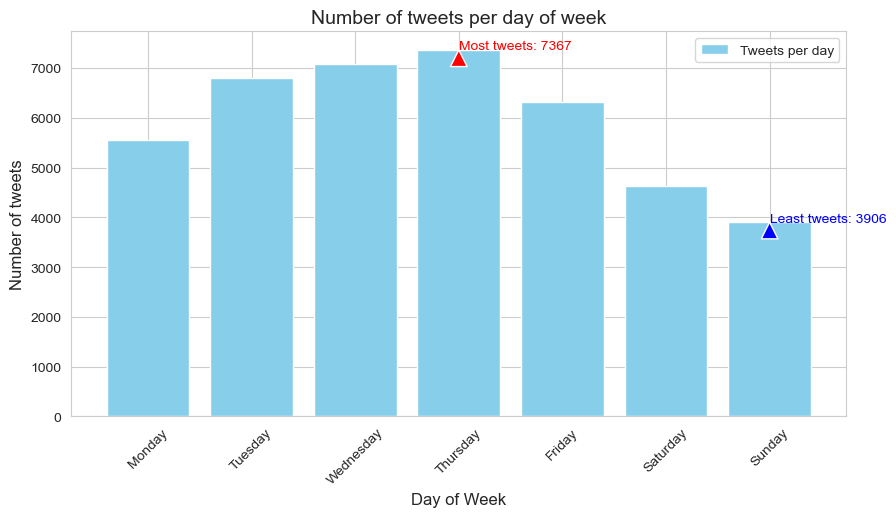

In [ ]:
#Number of tweets per day of the week
sns.set_style("whitegrid")

# Extracting day of week
tweetdata_copy['day_of_week'] = pd.to_datetime(tweetdata_copy['date_only']).dt.day_name()


tweets_per_dayofweek = tweetdata_copy['day_of_week'].value_counts()
tweets_per_dayofweek = tweets_per_dayofweek.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10,5))
barplot = plt.bar(tweets_per_dayofweek.index, tweets_per_dayofweek, color='skyblue', label='Tweets per day')
max_value = tweets_per_dayofweek.max()
max_index = tweets_per_dayofweek.idxmax()
plt.annotate('Most tweets: {}'.format(max_value), xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')
min_value = tweets_per_dayofweek.min()
min_index = tweets_per_dayofweek.idxmin()
plt.annotate('Least tweets: {}'.format(min_value), xy=(min_index, min_value), xytext=(min_index, min_value + 5),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10, color='blue')

plt.title('Number of tweets per day of week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

In [ ]:
#Setting Date as index
tweetdata_copy.set_index('Date', inplace=True)

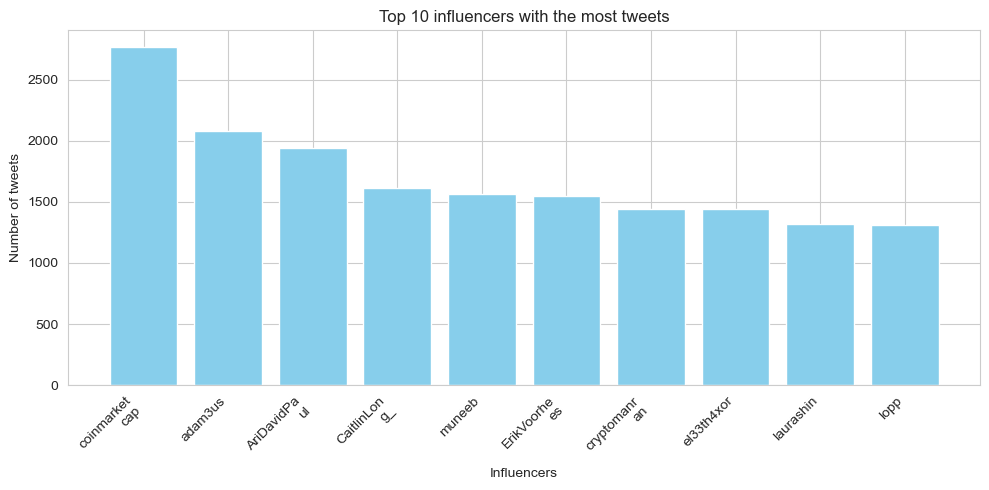

In [ ]:
#Top 10 influencers with most tweets
# Grouping by influencer
grouped = tweetdata_copy.groupby('User')

influencer_tweet_counts = grouped.size()
average_likes = grouped['Likes'].mean()
average_retweets = grouped['Retweets'].mean()
total_retweets_per_influencer = grouped['Retweets'].sum()
total_likes_per_influencer = grouped['Likes'].sum()

def wrap_labels(labels):
    return ['\n'.join(textwrap.wrap(label, 10)) for label in labels]

# Top 10
top_influencers = influencer_tweet_counts.nlargest(10)
top_influencers.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,5))
labels = wrap_labels(top_influencers.index)
plt.bar(labels, top_influencers, color='skyblue')
plt.title("Top 10 influencers with the most tweets")
plt.xlabel("Influencers")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

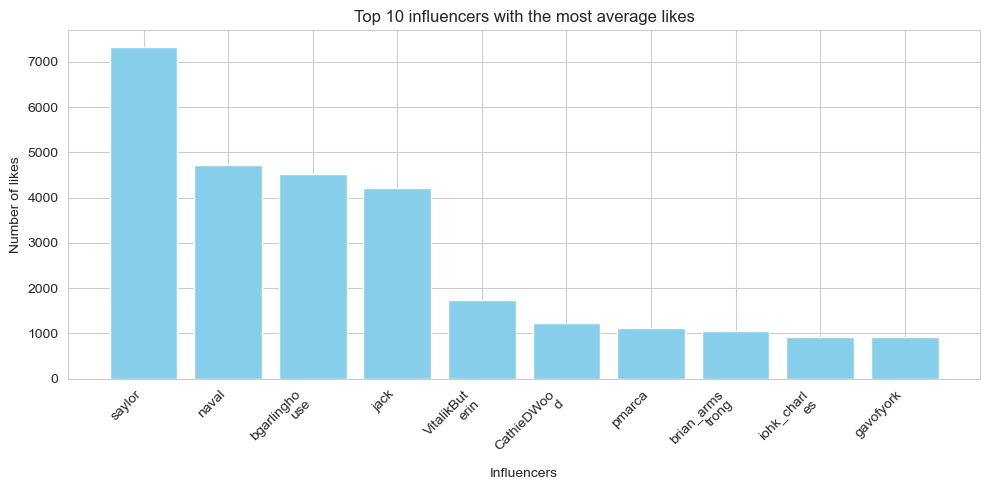

In [ ]:
# Top 10 influencers with the most average likes
plt.figure(figsize=(10,5))
labels = wrap_labels(average_likes.nlargest(10).index)
plt.bar(labels, average_likes.nlargest(10), color='skyblue')
plt.title("Top 10 influencers with the most average likes")
plt.xlabel("Influencers")
plt.ylabel("Number of likes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

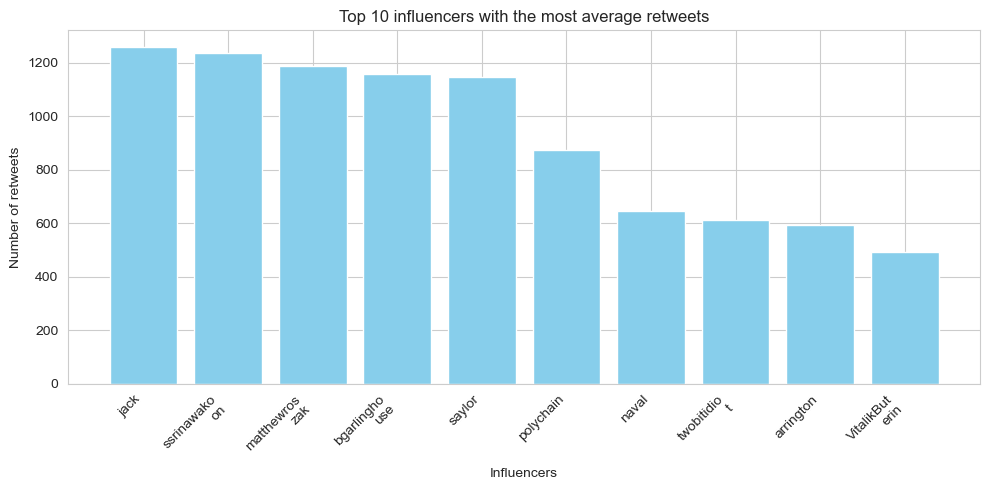

In [ ]:
# Top 10 influencers with the most average retweets
plt.figure(figsize=(10,5))
labels = wrap_labels(average_retweets.nlargest(10).index)
plt.bar(labels, average_retweets.nlargest(10), color='skyblue')
plt.title("Top 10 influencers with the most average retweets")
plt.xlabel("Influencers")
plt.ylabel("Number of retweets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## For Follower Count
tweetdatanew = pd.merge(tweetdata, followercount, on='User', how='left')

Influencer with the most followers: jack, number of followers: 6517295
Influencer with the least followers: SBF_Alameda, number of followers: 63


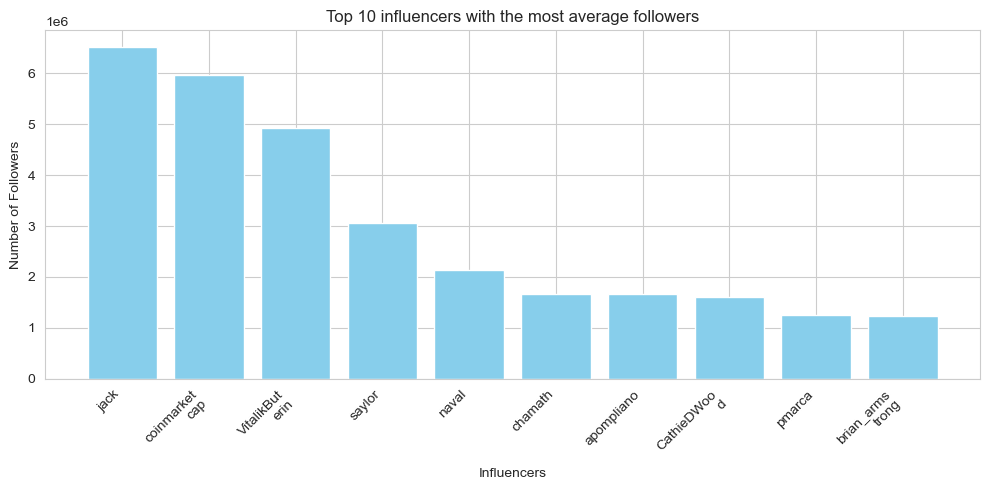

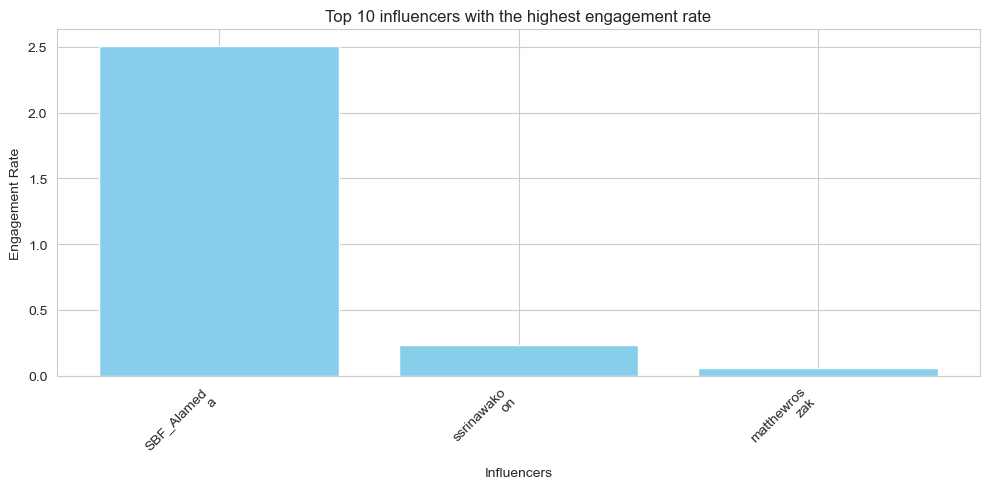

In [ ]:
#Top 10 influencers with the highest engagement rate
average_follower_count = tweetdatanew.groupby('User')['Follower Count'].mean()
max_follower_count = tweetdatanew.groupby('User')['Follower Count'].max()
min_follower_count = tweetdatanew.groupby('User')['Follower Count'].min()

print(f"Influencer with the most followers: {max_follower_count.idxmax()}, number of followers: {max_follower_count.max()}")
print(f"Influencer with the least followers: {min_follower_count.idxmin()}, number of followers: {min_follower_count.min()}")

# Calculating engagement rate as (average likes + average retweets) / average follower count
engagement_rate = (average_likes + average_retweets) / average_follower_count

# The top 10 influencers with the most average followers
plt.figure(figsize=(10,5))
labels = wrap_labels(average_follower_count.nlargest(10).index)
plt.bar(labels, average_follower_count.nlargest(10), color='skyblue')
plt.title("Top 10 influencers with the most average followers")
plt.xlabel("Influencers")
plt.ylabel("Number of Followers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The top 10 influencers with the highest engagement rate
plt.figure(figsize=(10,5))
labels = wrap_labels(engagement_rate.nlargest(3).index)
plt.bar(labels, engagement_rate.nlargest(3), color='skyblue')
plt.title("Top 10 influencers with the highest engagement rate")
plt.xlabel("Influencers")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
##Word Cloud
tweetdata['Tweet_lemmatized'] = tweetdata['Tweet_lemmatized'].astype(str)
all_tweets = ' '.join(tweetdata['Tweet_lemmatized'])
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate(all_tweets)

C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarni

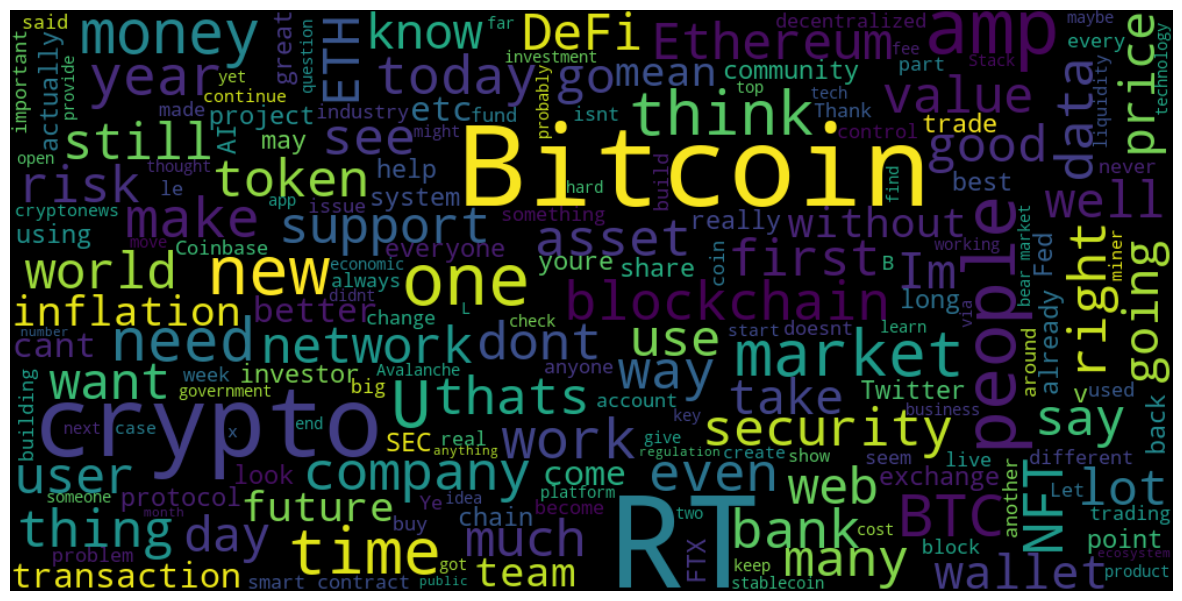

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Topic Modeling with LDA
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = tweetdata['Tweet_lemmatized'].values.tolist()
data_words = list(sent_to_words(data))

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
num_topics = 10

# Building LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Keywords
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"rt" + 0.011*"crypto" + 0.010*"bitcoin" + 0.007*"bank" + '
  '0.005*"people" + 0.005*"get" + 0.005*"know" + 0.005*"new" + 0.005*"make" + '
  '0.004*"year"'),
 (1,
  '0.016*"crypto" + 0.010*"rt" + 0.010*"bitcoin" + 0.006*"would" + '
  '0.005*"user" + 0.005*"one" + 0.004*"people" + 0.004*"im" + 0.004*"us" + '
  '0.004*"de"'),
 (2,
  '0.014*"rt" + 0.009*"bitcoin" + 0.009*"money" + 0.008*"time" + '
  '0.006*"market" + 0.005*"crypto" + 0.005*"people" + 0.004*"btc" + '
  '0.004*"need" + 0.004*"like"'),
 (3,
  '0.026*"bitcoin" + 0.016*"rt" + 0.010*"market" + 0.009*"crypto" + '
  '0.008*"new" + 0.005*"like" + 0.005*"amp" + 0.004*"dont" + 0.004*"long" + '
  '0.004*"eth"'),
 (4,
  '0.026*"bitcoin" + 0.012*"rt" + 0.008*"time" + 0.008*"people" + '
  '0.007*"crypto" + 0.005*"year" + 0.005*"security" + 0.005*"one" + '
  '0.005*"data" + 0.005*"think"'),
 (5,
  '0.012*"crypto" + 0.011*"rt" + 0.010*"market" + 0.009*"bitcoin" + '
  '0.007*"year" + 0.006*"get" + 0.006*"dont" + 0.006*"amp" +

In [ ]:
# Visualizing
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, n_jobs=1)

vis_data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000635 -0.011988       1        1  11.736559
6      0.001227 -0.028434       2        1  11.252529
7      0.009022 -0.036375       3        1  11.170133
3     -0.041422  0.041619       4        1  10.597024
4     -0.019696  0.019553       5        1   9.936855
5     -0.006533  0.004143       6        1   9.794779
2     -0.011589  0.016769       7        1   9.656859
8      0.014151 -0.036708       8        1   9.509452
9     -0.019762 -0.008857       9        1   9.095840
1      0.075235  0.040278      10        1   7.249971, topic_info=          Term          Freq         Total Category  logprob  loglift
501    bitcoin   7599.000000   7599.000000  Default  30.0000  30.0000
14038   stacks    388.000000    388.000000  Default  29.0000  29.0000
148       time   2146.000000   2146.000000  Default  28.0000  28.0000
162     crypto   6334.000000   6334.000000  Default  27.0000  27.0000
133         rt  10153.000000  10153.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
622        amp    125.366165   2349.424840  Topic10  -5.8708  -0.3065
221        get    114.026306   2105.910673  Topic10  -5.9657  -0.2919
609        btc    104.553806   1497.644528  Topic10  -6.0524  -0.0378
55         new    107.082171   2324.752279  Topic10  -6.0285  -0.4536
148       time    105.585707   2146.163180  Topic10  -6.0426  -0.3877

[880 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
6833       4  0.750735    aboard
10813      3  0.094849  abortion
10813      4  0.094849  abortion
10813      6  0.094849  abortion
10813     10  0.758795  abortion
...      ...       ...       ...
1511       6  0.108969       yoy
1511       8  0.036323       yoy
1511       9  0.544845       yoy
1511      10  0.036323       yoy
14421      4  0.765607    zombie

[2881 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 8, 4, 5, 6, 3, 9, 10, 2])

In [ ]:
#Network analysis for hashtags
hashtag = tweetdata.dropna(subset=['hashtags']).copy()

# Lemmatization to keep the root word
wn = nltk.WordNetLemmatizer()

def lemmatizer(sentence):
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [wn.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatizer
hashtag['hashtags_lem'] = hashtag['hashtags'].apply(lambda x: lemmatizer(x))

# Convert to lowercase
hashtag['hashtags_lem'] = hashtag['hashtags_lem'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
hashtag['hashtags_lem'].head()

Date
2023-06-08        longcovid
2022-12-26            nostr
2023-04-14     mining , btc
2023-01-26    ton , options
2023-04-02    consensus2023
Name: hashtags_lem, dtype: object

['bitcoin', 'crypto', 'cryptonews', 'cmc', 'cryptocurrency', 'coinmarketcap', 'ethereum', 'cmccommunity', 'nft', 'ai', 'iota', 'defi', 'cardano', 'blockchain', 'avalanche', 'shimmer', 'btc', 'cmcglossary', 'web3', 'data']
Graph with 20 nodes and 124 edges


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12388\1270661473.py:21: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


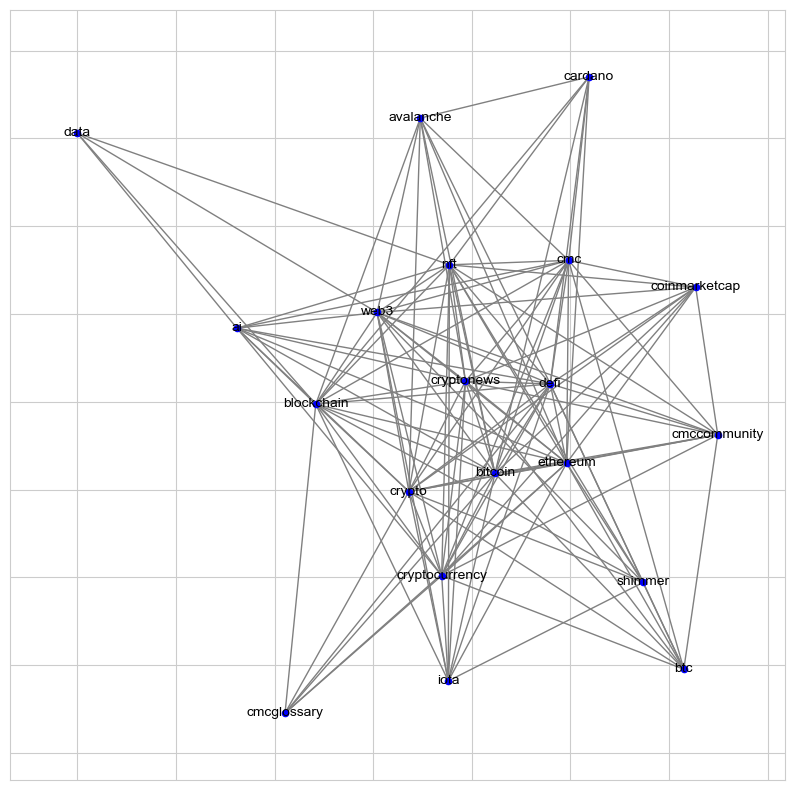

In [ ]:
all_hashtags = hashtag['hashtags_lem'].tolist()
all_hashtags = [hashtag for sublist in all_hashtags for hashtag in sublist.replace(',', ' ').split()]

hashtag_freq = Counter(all_hashtags)

# The top 20 hashtags
top_20_hashtags = [hashtag for hashtag, freq in hashtag_freq.most_common(20)]
top_20_hashtags = [hashtag for hashtag in top_20_hashtags if not hashtag.isdigit()]

print(top_20_hashtags)

pairs = []

for hashtags in hashtag['hashtags_lem']:
    hashtags = hashtags.replace(',', ' ').split()
    hashtags = [hashtag for hashtag in hashtags if hashtag in top_20_hashtags]
    pairs.extend(list(itertools.combinations(set(hashtags), 2)))

pairs_df = pd.DataFrame(pairs, columns=['source', 'target'])
G = nx.from_pandas_edgelist(pairs_df, 'source', 'target')
print(nx.info(G))

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=20, node_color='blue', edge_color='grey', font_size=10)
plt.show()

In [ ]:
print(top_20_hashtags)

['bitcoin', 'crypto', 'cryptonews', 'cmc', 'cryptocurrency', 'coinmarketcap', 'ethereum', 'cmccommunity', 'nft', 'ai', 'iota', 'defi', 'cardano', 'blockchain', 'avalanche', 'shimmer', 'btc', 'cmcglossary', 'web3', 'data']


In [ ]:
# Top 5 nodes with highest degree centrality
degree_centrality = nx.degree_centrality(G)
print(sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:5])

[('ethereum', 0.9473684210526315), ('defi', 0.9473684210526315), ('bitcoin', 0.894736842105263), ('crypto', 0.894736842105263), ('nft', 0.8421052631578947)]


In [ ]:
# Top 5 nodes with highest betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print(sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:5])

[('blockchain', 0.05369421027315763), ('ethereum', 0.04775005696058327), ('defi', 0.04775005696058327), ('nft', 0.04543365990734412), ('web3', 0.041794933461600126)]


In [ ]:
# Community Detection using Louvain method
partition = community_louvain.best_partition(G)
first_five_items = {k: partition[k] for k in list(partition)[:5]}
print(first_five_items)

{'bitcoin': 0, 'crypto': 1, 'cardano': 1, 'ethereum': 1, 'defi': 1}


In [ ]:
#For Sentiments EDA

In [ ]:
# Defining the sentiment category based on the compound_score
vader['sentiment_category'] = vader['compound_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

In [ ]:
# Descriptive statistics of sentiment scores
sentiment_desc = vader['compound_score'].describe()
print(sentiment_desc)

count    41665.000000
mean         0.198635
std          0.450620
min         -0.971200
25%          0.000000
50%          0.202300
75%          0.585900
max          0.987500
Name: compound_score, dtype: float64


In [ ]:
#Proportion of each sentiment category
sentiment_counts = vader['sentiment_category'].value_counts()
sentiment_proportions = sentiment_counts / len(vader)
print(sentiment_proportions)

positive    0.553774
neutral     0.226833
negative    0.219393
Name: sentiment_category, dtype: float64


In [ ]:
# Descriptive statistics for each sentiment category
desc_stats_categories = vader.groupby('sentiment_category')['compound_score'].describe()
print(desc_stats_categories)

                      count      mean       std     min     25%     50%  \
sentiment_category                                                        
negative             9141.0 -0.441319  0.234948 -0.9712 -0.6249 -0.4278   
neutral              9451.0  0.000278  0.007353 -0.0498  0.0000  0.0000   
positive            23073.0  0.533420  0.233103  0.0511  0.3612  0.5413   

                       75%     max  
sentiment_category                  
negative           -0.2584 -0.0516  
neutral             0.0000  0.0500  
positive            0.7269  0.9875  


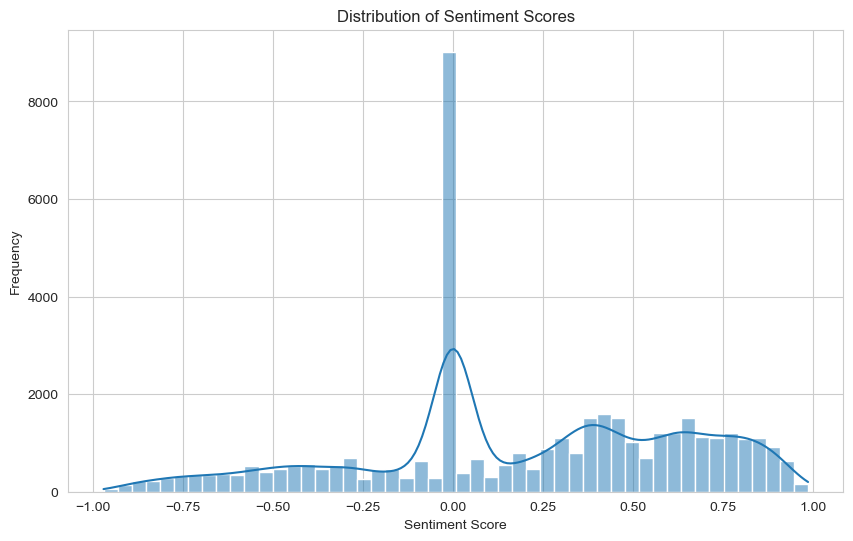

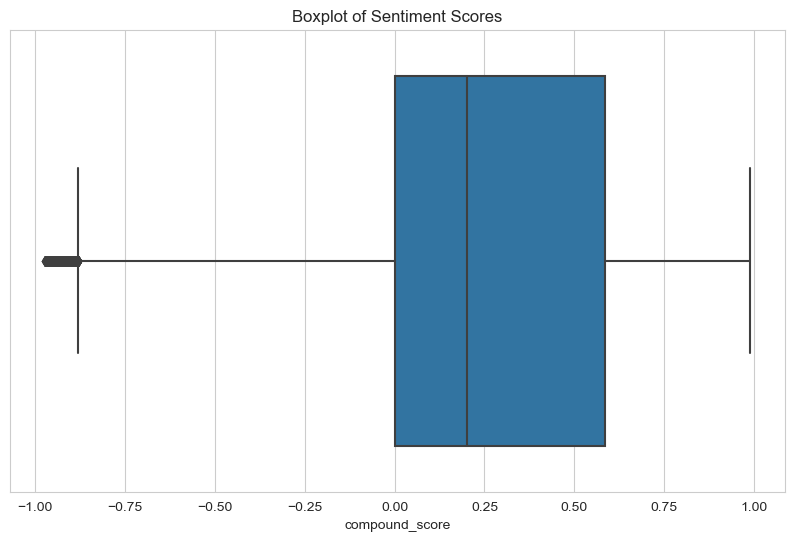

In [ ]:
# Plotting a histogram
plt.figure(figsize=(10,6))
sns.histplot(vader['compound_score'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plotting a box plot
plt.figure(figsize=(10,6))
sns.boxplot(x=vader['compound_score'])
plt.title('Boxplot of Sentiment Scores')
plt.show()

Overall average text length: 14.88198727949118
Average text length negative: 16.628049447544033
Average text length neutral: 10.609353507565338
Average text length positive: 15.940363195076497
Median text length negative: 16.0
Median text length neutral: 10.0
Median text length positive: 15.0
Max text length negative: 53
Max text length neutral: 54
Max text length positive: 49
Min text length negative: 1
Min text length neutral: 1
Min text length positive: 1


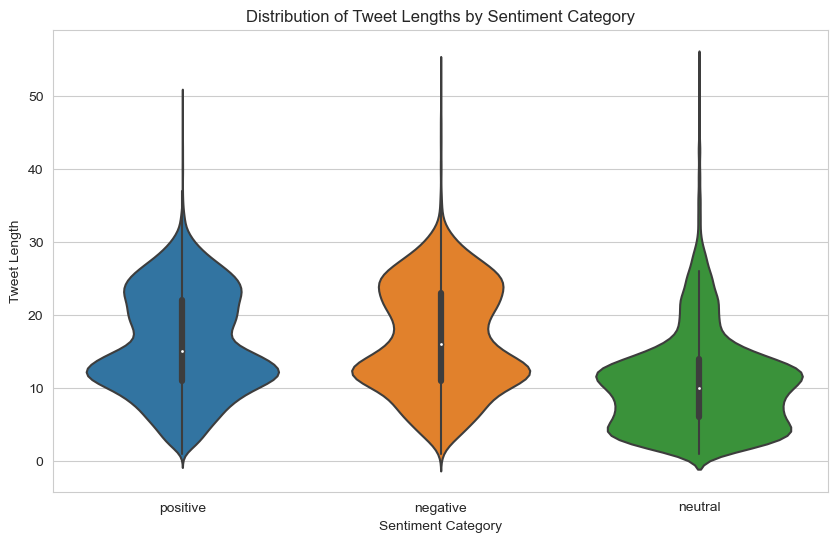

In [ ]:
# Length of each tweet
vader['length'] = vader['Tweet_lemmatized'].dropna().str.split().map(lambda x: len(x) if type(x) == list else 0)

# Separating the data into three categories
vader_neg = vader[vader['sentiment_category'] == 'negative']
vader_neu = vader[vader['sentiment_category'] == 'neutral']
vader_pos = vader[vader['sentiment_category'] == 'positive']

# Statistics
print(f"Overall average text length: {vader['length'].mean()}")
print(f"Average text length negative: {vader_neg['length'].mean()}")
print(f"Average text length neutral: {vader_neu['length'].mean()}")
print(f"Average text length positive: {vader_pos['length'].mean()}")

print(f"Median text length negative: {vader_neg['length'].median()}")
print(f"Median text length neutral: {vader_neu['length'].median()}")
print(f"Median text length positive: {vader_pos['length'].median()}")

print(f"Max text length negative: {vader_neg['length'].max()}")
print(f"Max text length neutral: {vader_neu['length'].max()}")
print(f"Max text length positive: {vader_pos['length'].max()}")

print(f"Min text length negative: {vader_neg['length'].min()}")
print(f"Min text length neutral: {vader_neu['length'].min()}")
print(f"Min text length positive: {vader_pos['length'].min()}")

# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x="sentiment_category", y="length", data=vader)
plt.title('Distribution of Tweet Lengths by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Length')
plt.show()

In [ ]:
# Word cloud for negative tweets
vader_neg = vader[vader['sentiment_category'] == 'negative']
text_neg = " ".join(review for review in vader_neg['Tweet_lemmatized'] if isinstance(review, str))
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate(text_neg)

C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarni

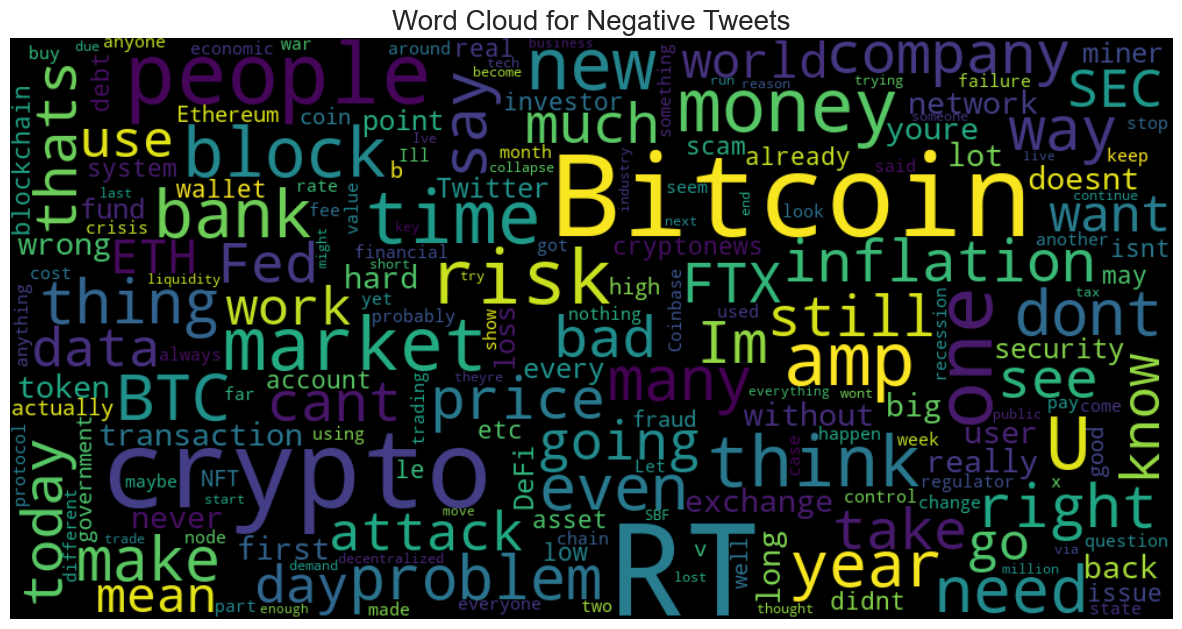

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud for Negative Tweets', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
# Word cloud for positive tweets
vader_pos = vader[vader['sentiment_category'] == 'positive']
text_pos = " ".join(review for review in vader_pos['Tweet_lemmatized'] if isinstance(review, str))
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate(text_pos)

C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarni

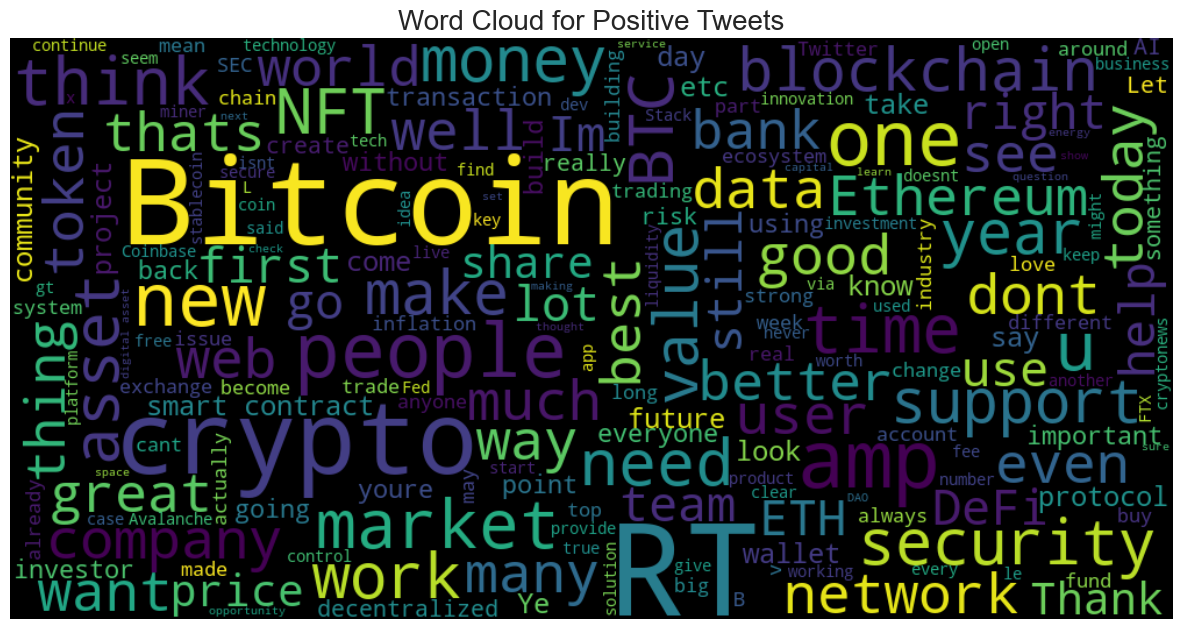

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud for Positive Tweets', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
# Word cloud for neutral tweets
vader_neutral = vader[vader['sentiment_category'] == 'neutral']
text_neutral = " ".join(review for review in vader_neutral['Tweet_lemmatized'] if isinstance(review, str))
wordcloud = WordCloud(width = 1000, height = 500, random_state=21, max_font_size=110).generate(text_neutral)

C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarni

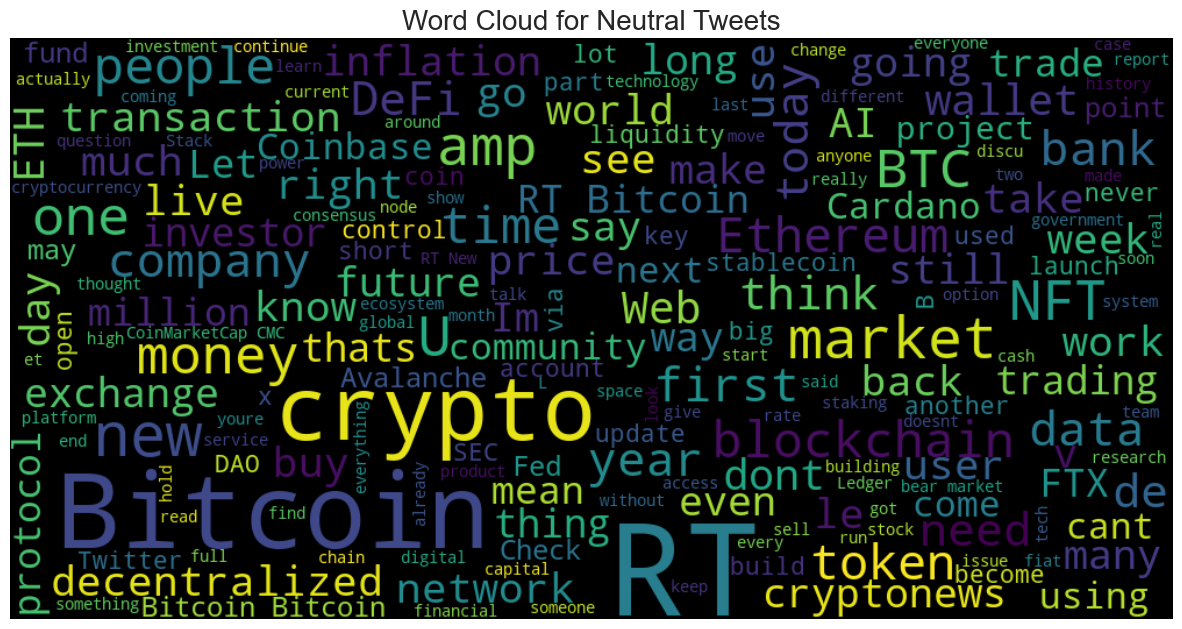

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud for Neutral Tweets', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
# Average sentiment score by user
avg_sentiment_by_user = vader.groupby('User')['compound_score'].mean()
avg_sentiment_by_user = avg_sentiment_by_user.sort_values(ascending=False)
print(avg_sentiment_by_user)

User
timdraper        0.560045
sergeynazarov    0.535220
sammcingvale     0.532937
ptj_official     0.525218
dahongfei        0.490800
                   ...   
ericlarch        0.079685
laurashin        0.077664
gavinandresen    0.069420
pwuille          0.048124
vansa_c          0.000000
Name: compound_score, Length: 85, dtype: float64


Correlation between sentiment and likes: -0.019785769253880446
Correlation between sentiment and retweets: -0.01846478152835974


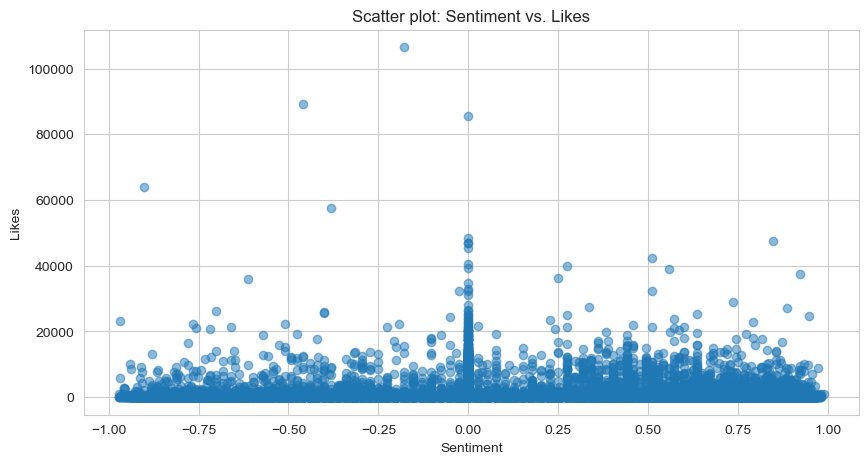

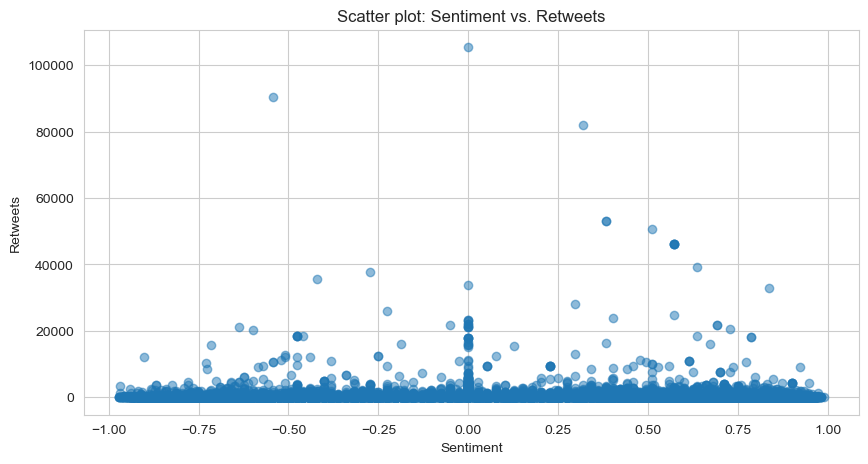

In [ ]:
# Correlation between sentiment and engagement metrics
corr_likes = vader['compound_score'].corr(vader['Likes'])
corr_retweets = vader['compound_score'].corr(vader['Retweets'])

print(f"Correlation between sentiment and likes: {corr_likes}")
print(f"Correlation between sentiment and retweets: {corr_retweets}")

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(vader['compound_score'], vader['Likes'], alpha=0.5)
plt.title('Scatter plot: Sentiment vs. Likes')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(vader['compound_score'], vader['Retweets'], alpha=0.5)
plt.title('Scatter plot: Sentiment vs. Retweets')
plt.xlabel('Sentiment')
plt.ylabel('Retweets')
plt.show()